## The use of inheritance as an informal interface
La interface es una clase que permite definir metodos pero sin implementarlos. La implementacion esta en otro lado. Aparte de la implemntacion por herencia, las interfaces tambien se pueden implementar por clases abstractas. Esto lo vemos mas tarde.

El ejemplo que mostramos a continuacion es de una interface para clase Animall  con dos metodos que son "oralSound" y "move"


In [ ]:
# interface informal
# asi como en Java y C++ las intefaces como esta exigen los tipos y el retorno. La signature
# no necesita __init__
class Animal:
    def move(self, name:str, start:float, end:float, times:float)-> None:
        pass

    def oralSound(self, name:str, volume:float)->None:
        pass

    def jump(self, name:str, height:float)->None:
        pass


class Perro(Animal):
    def __init__(self, nameMove, start, end, time, nameSound, volume):
        self.nameMove = nameMove
        self.start = start # en metros
        self.end = end # en metros
        self.time = time # en segundos
        self.nameSound = nameSound # string
        self.volume = volume # en decibeles
        return


    def move(self):
        distance = self.end - self.start
        averageSpeed = distance/self.time
        print("A dog %s at a speed of %f  m/s"%(self.nameMove, averageSpeed))
        return

    def oralSound(self):
        name = self.nameSound
        print("A dog %s at a volume of %f in db"%(name, self.volume))
        return

    # en C++ y Java se genera un error automatico si una interface informal
    # no se implementa
    def jump(self):
        raise NotImplementedError # de esto (exceptions) hablamos despues

myAnimal = Animal() # una interface mediante herencia se puede instanciar
# una clase abstracta no se puede instanciar. Esto lo vemos
# mas adelante.

print(dir(myAnimal))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'jump', 'move', 'oralSound']


In [ ]:
myPerro = Perro("runs", 10, 20, 2, "barks", 50)
myPerro.__dict__

{'nameMove': 'runs',
 'start': 10,
 'end': 20,
 'time': 2,
 'nameSound': 'barks',
 'volume': 50}

In [ ]:
myPerro.move()

A dog runs at a speed of 5.000000  m/s


In [ ]:
myPerro.oralSound()

A dog barks at a volume of 50.000000 in db


In [ ]:
myPerro.jump()

NotImplementedError: ignored

En esta clase no estudiamos protocolos. Sin embargo incluyo un ejemplo donde se crean interfaces usando protocolos

In [ ]:
from typing import Protocol
class Animal(Protocol):
    def move(self, name:str, start:float, end:float, time:float)->None:
        pass

    def oralSound(self, name:str, volume:float)->None:
        pass

    def jump(self, name:str, height:float)->None:
        pass

class Perro(Animal):
    def __init__(self, nameMove, start, end, time, nameSound, volume):
        self.nameMove = nameMove
        self.start = start # en metros
        self.end = end # en metros
        self.time = time # en seconds
        self.nameSound = nameSound # string
        self.volume = volume # in dB
        return

    def move(self):
        distance = self.end - self.start
        averageSpeed = distance/self.time

        print("This dog %s at a speed of %f m/s\n"%(self.nameMove, averageSpeed))
        return

    def oralSound(self):
        name = self.nameSound
        print("A dog %s at a volume of %f db\n"%(name, self.volume))
        return


    def jump(self):
        # not implemented make an exception
        raise NotImplementedError

# myAnimal=Animal()




In [ ]:
myPerro = Perro("runs", 10, 20, 2 ,"barks", 50)
myPerro.__dict__

{'nameMove': 'runs',
 'start': 10,
 'end': 20,
 'time': 2,
 'nameSound': 'barks',
 'volume': 50}

In [ ]:
myPerro.move()

This dog runs at a speed of 5.000000 m/s



In [ ]:
myPerro.oralSound()

In [ ]:
class Perro:
    def __init__(self, nameMove, start, end, time, nameSound, volume):
        self.nameMove = nameMove
        self.start = start # en metros
        self.end = end # en metros
        self.time = time # en segundos
        self.nameSound = nameSound # string
        self.volume = volume # en decibeles
        return


    def move(self):
        distance = self.end - self.start
        averageSpeed = distance/self.time
        print("A dog %s at a speed of %f  m/s"%(self.nameMove, averageSpeed))
        return

    def oralSound(self):
        name = self.nameSound
        print("A dog %s at a volume of %f in db"%(name, self.volume))
        return

    # en C++ y Java se genera un error automatico si una interface informal
    # no se implementa
    def jump(self):
        raise NotImplementedError # de esto (exceptions) hablamos despues


In [ ]:

myPerro = Perro("runs", 10, 20, 2 ,"barks", 50)

In [ ]:
vars(myPerro)

{'nameMove': 'runs',
 'start': 10,
 'end': 20,
 'time': 2,
 'nameSound': 'barks',
 'volume': 50}

## Otro ejemplo donde se use ```herencia```.
En este caso la herencia es de dos padres a dos hijos (sin compartir). Es decir padre A a hijo C y padre B a hijo D,
entre A y B no hay interseccion y lo mismo en C y D.

In [ ]:
from statistics import mean, median, mode
# un modelo de estudiantes en un colegio o universidad
class Group:
    weights = [0.3, 0.3, 0.4] #  variable de clase

    def __init__(self, students):
        self.students = students
        return

class Students(Group):
    def __init__(self, hw, partial, final, name, identification):
        self.hw = hw
        self.partial = partial
        self.final = final
        self.name = name
        self.id = identification
        return

    def finalGrade(self):
        return self.hw*self.weights[0] + self.partial*self.weights[1] \
            + self.final*self.weights[2]


class Grades:
    def __init__(self, myList):
        self.myList = myList
        return

    def minim(self):
        return min(self.myList)

    def maxim(self):
        return max(self.myList)

class Statistics(Grades):
    def meanValue(self):
        return mean(self.myList)

    def medianValue(self):
        return median(self.myList)

    def modeValue(self):
        return mode(self.myList)

# my clase de estudiantes, puede ser leida de una base de datos
juan = Students(3, 3.4, 2.8, "Juan", "23453")
pedro = Students(2.1, 2.2, 4.6, "Pedro", "35244")

In [ ]:
print(juan.__dict__)
print(pedro.__dict__)


{'hw': 3, 'partial': 3.4, 'final': 2.8, 'name': 'Juan', 'id': '23453'}
{'hw': 2.1, 'partial': 2.2, 'final': 4.6, 'name': 'Pedro', 'id': '35244'}


In [ ]:
juan.finalGrade()


3.04

In [ ]:
pedro.finalGrade()

3.13

In [ ]:
# lista pequena
myStudents = [juan, pedro]

myClass = []
for student in myStudents:
    myClass.append(Group(student))

In [ ]:
myClass[0].students.__dict__

{'hw': 3, 'partial': 3.4, 'final': 2.8, 'name': 'Juan', 'id': '23453'}

In [ ]:
# lista de grados
myGrades = []
for i in range(len(myClass)):
    myGrades.append(myClass[i].students.finalGrade())


In [ ]:
myGrades

[3.04, 3.13]

In [ ]:
cal = Grades(myGrades)
print("minimum grade", cal.minim())
print("maximum grade", cal.maxim())

minimum grade 3.04
maximum grade 3.13


In [ ]:
cal.meanValue()

AttributeError: ignored

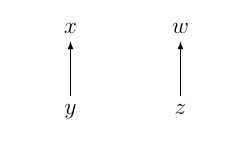

$x \mapsto$ ```Group```  $\quad$ herencia  $\quad$ $y \mapsto$ ```Students``` \\
$x \mapsto$ ```Grades```  $\quad$ herencia  $\quad$ $y \mapsto$ ```Statistics``` \\

In [ ]:
calStat = Statistics(myGrades)
print("minimum grade", calStat.minim())
print("maximum grade", calStat.maxim())

meanv = calStat.meanValue()
medianv = calStat.medianValue()
modev = calStat.modeValue()


print("mean value", meanv)
print("median value", medianv)
print("mode value", modev)

minimum grade 3.04
maximum grade 3.13
mean value 3.085
median value 3.085
mode value 3.04


# Proxima clase Override